Лабораторная работа 2.5.1

Измерение коэффициента поверхностного натяжения жидкости.

In [1]:

from matplotlib import pyplot as plt
import numpy as np
from math import sqrt

In [2]:
# Const
k_p = 0.2 * 9.81  # Перевод делений манометра в давление
sigma_p = 0.1 * 9.81  # Погрешность манометра
s_C2H5OH = 22.78e-3  # Коэффициент поверхностного натяжения спирта
sigma_T = 0.1  # Погрешность термометра
ro_H2O = 997  # Плотность воды
g = 9.815  # Ускорение свободного падения
sigma_H = 0.5e-3  # Погрешность линейки

Предварительные измерения

In [3]:
# Определение радиуса иглы по формуле Лапласа
T_0 = 22.5  # Температура воды, C
P_0_array = np.array([48, 49, 49, 49, 49]) * k_p  # Разница давления жидкости у поверхности и атмосферного
P_0 = np.mean(P_0_array)  # Давление
r_1 = 2 * s_C2H5OH / P_0  # Радиус иглы через формулу Лапласа
sigma_p_0 = sqrt(sigma_p ** 2 + np.std(P_0_array) ** 2)
sigma_r_1 = r_1 / P_0 * sigma_p_0  # Погрешность определения радиуса

In [4]:
# Измерение радиуса иглы микроскопом
n = 23  # Деления
sigma_n = 2.5  # Погрешность определения количества делений (смотрели под углом через камеру, видно плохо)
d = 0.05e-3  # Цена деления
r_2 = 0.5 * n * d  # Радиус трубы через микроскоп
sigma_r_2 = 2.5 * d  # Погрешность определения радиуса

In [5]:
# Измерение давления на разных высотах в воде
P_2_H1 = 135 * k_p  # Давление сверху, по 6-ти измерениям
P_2_H2 = 224 * k_p  # Давление снизу, по 3-м измерениям
H_1 = -52e-3
H_2 = -71e-3
delta_H = abs(H_2 - H_1)  # Разница высоты
delta_P_m = abs(P_2_H2 - P_2_H1)  # Разница давлений по манометру
sigma_P_m = 2 * sigma_p  # Погрешность определения разницы давлений по манометру
delta_P_h = ro_H2O * g * delta_H  # Разница давлений по линейке
sigma_P_h = delta_P_h / delta_H * 2 * sigma_H  # Погрешность опреденения разницы давлений по линейке

Основные измерения

In [6]:
T_1 = 22.8
P_1 = 224 * k_p

T_2 = 28.3
P_2_array = np.array([221, 220.5, 220, 220, 220, 220]) * k_p
P_2 = np.mean(P_2_array)
sigma_p_2 = sqrt(sigma_p ** 2 + np.std(P_2_array) ** 2)

T_3 = 34.2
P_3_array = np.array([220, 220.5, 220.5, 220.5, 220.5]) * k_p
P_3 = np.mean(P_3_array)
sigma_p_3 = sqrt(sigma_p ** 2 + np.std(P_3_array) ** 2)

T_4 = 38.5
P_4 = 219.5 * k_p

T_5 = 42.7
P_5 = 218 * k_p

T_6 = 47.9
P_6 = 216.5 * k_p

T_7 = 53
P_7_array = np.array([215, 215, 214.5, 215]) * k_p
P_7 = np.mean(P_7_array)
sigma_p_7 = sqrt(sigma_p ** 2 + np.std(P_7_array) ** 2)

T_8 = 58.2
P_8_array = np.array([213, 213, 212.5, 212.5, 213]) * k_p
P_8 = np.mean(P_8_array)
sigma_p_8 = sqrt(sigma_p ** 2 + np.std(P_8_array) ** 2)

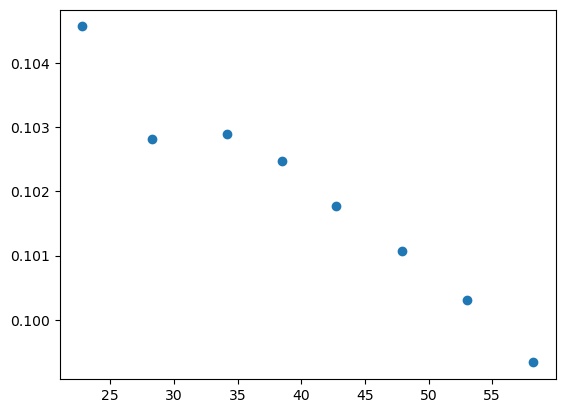

In [7]:
T = np.array([T_1, T_2, T_3, T_4, T_5, T_6, T_7, T_8])
P = np.array([P_1, P_2, P_3, P_4, P_5, P_6, P_7, P_8])
sigma_P = np.array([sigma_p, sigma_p_2, sigma_p_3, sigma_p, sigma_p, sigma_p, sigma_p_7, sigma_p_8])
s_H2O = r_1 / 2 * P  # Поверхностное натяжение воды
sigma_s_H2o = sigma_P / P * s_H2O
plt.scatter(T, s_H2O)

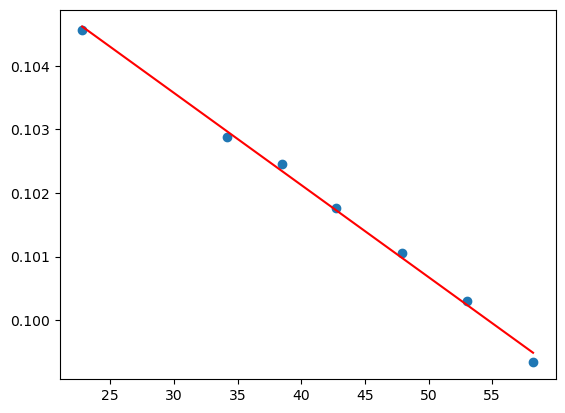

In [8]:
# Вторая точка ошибочна, попробуем без неё
T_new = np.array([T_1, T_3, T_4, T_5, T_6, T_7, T_8])
P_new = np.array([P_1, P_3, P_4, P_5, P_6, P_7, P_8])
sigma_P_new = np.array([sigma_p, sigma_p_3, sigma_p, sigma_p, sigma_p, sigma_p_7, sigma_p_8])
s_H2O_new = r_1 / 2 * P_new  # Поверхностное натяжение воды
plt.scatter(T_new, s_H2O_new)
# Метод наименьших квадратов
k = round((np.mean(T_new * s_H2O_new) - np.mean(T_new) * np.mean(s_H2O_new)) / (np.mean(T_new ** 2) - np.mean(T_new) ** 2), 7)
b = round(np.mean(s_H2O_new) - k * np.mean(T_new), 7)
sigma_k = round(sqrt(((np.mean(s_H2O_new ** 2) - np.mean(s_H2O_new) ** 2) / 
               (np.mean(T_new ** 2) - np.mean(T_new) ** 2)) - k ** 2) / sqrt(len(s_H2O_new)), 7) 
sigma_b = round(sigma_k * sqrt(np.mean(T_new ** 2) - np.mean(T_new) ** 2), 7)

plt.plot(T_new, k * T_new + b, color='red')

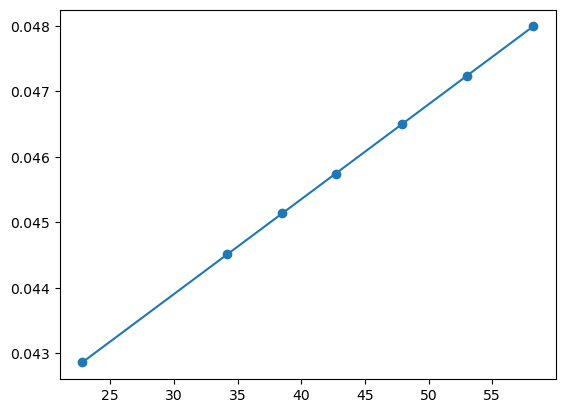

In [9]:
q =  -k * (T_new + 273)
plt.scatter(T_new, q)
plt.plot(T_new, q)

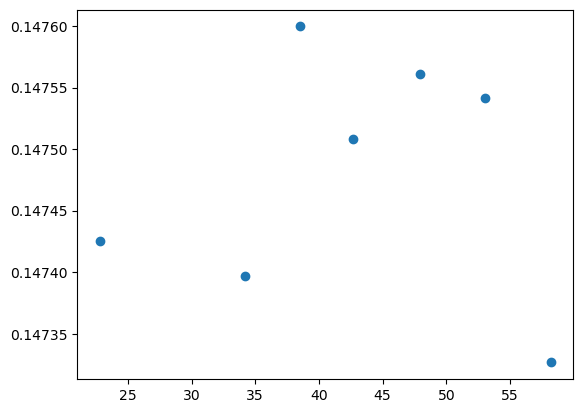

In [10]:
s_H2O_new = r_1 / 2 * P_new
U_F = s_H2O_new + q
plt.scatter(T_new, U_F)